In [1]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f8861809747b42cb6b0bece74007317c0a8d2a88a0c69152d953d8c2d43624f9
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


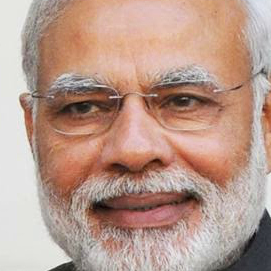

encodings :  [-0.04891831  0.05253191  0.04047107 -0.06064957 -0.05350816 -0.09263188
  0.00143272 -0.06087495  0.11769918 -0.02124135  0.20065413  0.01621578
 -0.22712713 -0.11769008  0.03745628  0.05108473 -0.09888615 -0.07884929
 -0.16044773 -0.06419387  0.0064248   0.03842475  0.06332763 -0.03242792
 -0.10261675 -0.23347461 -0.069373   -0.12071572  0.0370117  -0.13023189
  0.02945323  0.06261179 -0.20423174 -0.06537801 -0.02215086  0.03901205
 -0.06539574 -0.08648754  0.17835981 -0.0461341  -0.16206369  0.00046426
  0.0322805   0.16117728  0.22621912 -0.04591337 -0.02074634 -0.01056975
  0.07231057 -0.25738788  0.03009411  0.14408013  0.04076048  0.12663788
  0.06945722 -0.09034872  0.05872706  0.11843601 -0.16522652  0.03963986
  0.0426056  -0.17304052 -0.04478084 -0.05172923  0.13787396  0.05188866
 -0.0596844  -0.14531328  0.10149195 -0.16591398 -0.04614932  0.14667708
 -0.10386893 -0.136125   -0.20730712  0.08388883  0.31756416  0.17294431
 -0.13159025  0.04189119 -0.15479311 -

In [11]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
 
#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('/content/drive/MyDrive/IIITH/CVProject/RefImagesTest'))
knownEncodings = []
knownNames = []
# loop over the image paths
for imagePath in os.listdir("/content/drive/MyDrive/IIITH/CVProject/RefImagesTest"):
#for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath
    #name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread('/content/drive/MyDrive/IIITH/CVProject/RefImagesTest/' + imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(gray,model='hog')
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/IIITH/CVProject/haarcascade_frontalface_default.xml')
    #faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=10,
                                          minSize=(60,60),
                                          flags=cv2.CASCADE_SCALE_IMAGE)



    for (x, y, w, h) in faces:
      cv2_imshow(image[y:y + h, x:x + w])
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, faces)
    # loop over the encodings
    for encoding in encodings:
        print('encodings : ', encoding)
        knownEncodings.append(encoding)
        knownNames.append(name)
#save emcodings along with their names in dictionary data
data = {"encodings": knownEncodings, "names": knownNames}
#use pickle to save data into a file for later use
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

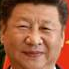

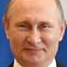

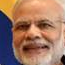

['Q1058.jpg']
[[432 147  69  69]
 [630 173  67  67]
 [241 176  65  65]
 [ 54 183  73  73]]


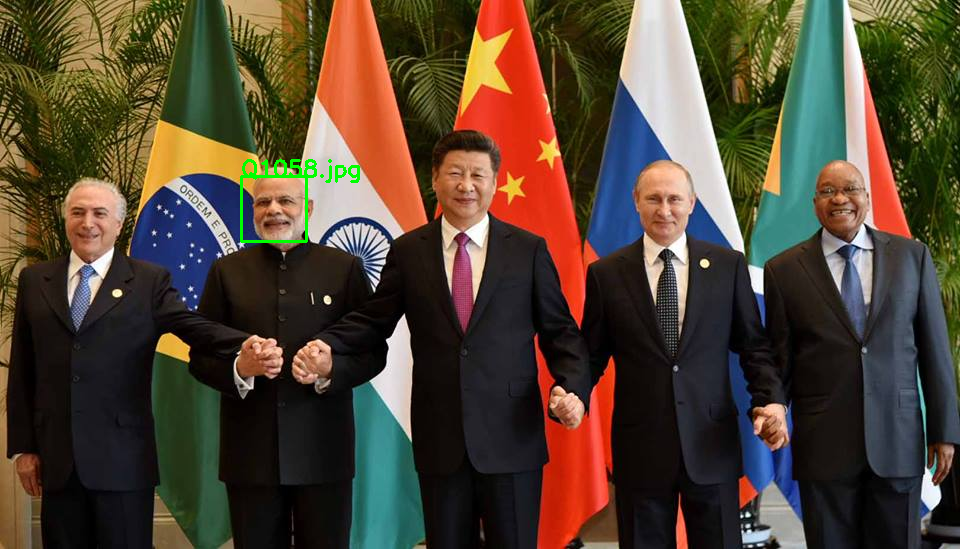

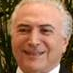

In [24]:
import face_recognition
import imutils
import pickle
import time
import cv2
import os
 
#find path of xml file containing haarcascade file
cascPathface = os.path.dirname(
 cv2.__file__) + "/content/drive/MyDrive/IIITH/CVProject/haarcascade_frontalface_default.xml"
# load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cascPathface)
# load the known faces and embeddings saved in last file
data = pickle.loads(open('face_enc', "rb").read())
#Find path to the image you want to detect face and pass it here
image = cv2.imread('/content/drive/MyDrive/IIITH/CVProject/imageTest/831.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/IIITH/CVProject/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)

# the facial embeddings for face in input
#encodings = face_recognition.face_encodings(rgb)
#print(len(encodings))
#names = []
# loop over the facial embeddings incase
# we have multiple embeddings for multiple fcaes
#for encoding in encodings:


for (x, y, w, h) in faces:
    cv2_imshow(image[y:y + h, x:x + w])
    encoding = face_recognition.face_encodings(cv2.cvtColor(image[y:y + h, x:x + w], cv2.COLOR_BGR2RGB))
    names = []
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely
    #and False for rest
    matches = face_recognition.compare_faces(data["encodings"], encoding[0])
    #set name =inknown if no encoding matches
    name = "Unknown"
    # check to see if we have found a match
    if True in matches:
        #Find positions at which we get True and store them
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]
            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1
            #set name which has highest count
            name = max(counts, key=counts.get)
 
 
        # update the list of names
        names.append(name)
        print(names)
        print(faces)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
          0.75, (0, 255, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
